  <center><span style="font-size:36px;"> Выпускной проект: Анализ рекламных источников мобильной игры "Космические братья" </span></center>

## Материалы
[dashbord](https://public.tableau.com/app/profile/vadim.migunov/viz/Final_project_16826783187050/Dashboard1)

[Презентация](https://docs.google.com/presentation/d/1-0efnxJPc3JMTl-NKSrr6WSZoFxYaJlvQikq6eDKNEk/edit?usp=sharing)

# Описание проекта

Мы, аналитик в игровой кампании "Космические братья", которая выпускает одноименную мобильную игру. В ней пользователи строят свою космическую программу и пытаются преуспеть в нелёгком деле колонизации галактики.

Основная монетизация игры — только планируется. Но предполагается, что в приложении будет происходить показ рекламы на экране с выбором типа объекта для постройки.

## Цели проекта

Проализировать данные, для разработки основной модели монетезации игры.


## Задачи

    Провести предобработку данных
    Провести исследовательский анализ данных.
    Проанализировать влияние событий на совершение целевого события.
    Проверить статистические гипотезы:
    Проверьте статестические гипотезы
        Проверить гипотезу различия времени прохождения уровня между пользователями, которые заканчивают уровень
            через реализацию проекта
            пользователями, которые заканчивают уровень победой над другим игроком.
        Сфомулировать собственную статистическую гипотезу. Дополнив её нулевой и альтернативной гипотезами.
            Проверить гипотезу с помощью статистического теста



## Описание датасетов:

Основной датасет содержит данные о событиях, совершенных в мобильной игре «Космические братья». В ней пользователи строят
    свою космическую программу и пытаются преуспеть в нелёгком деле колонизации галактики.


Основная монетизация игры — только планируется. Но предполагается, что в приложении будет происходить показ рекламы на
    экране с выбором типа объекта для постройки.


В датасете представлены данные по игре пользователей на первом уровне. Завершение первого уровня требует от игрока
    выполнения одного из двух условий:

Победа над первым врагом
    Реализация проекта - разработка орбитальной сборки спутников


В датасете содержатся данные первых пользователей приложения — когорты пользователей, которые начали пользоваться
    приложением в период с 4 по 10 мая включительно.
    
    
    
<details>
  <summary> <strong>Нажми меня, чтобы увидеть информацию о датасетах</strong> </summary>
    
    Датасет game_actions.csv:

    event_datetime — время события;
    event — одно из трёх событий:
        building — объект построен,
        finished_stage_1 — первый уровень завершён,
        project — проект завершён;
    building_type — один из трёх типов здания:
        assembly_shop — сборочный цех,
        spaceport — космопорт,
        research_center — исследовательский центр;
    user_id — идентификатор пользователя;
    project_type — тип реализованного проекта;

    ad_costs.csv и user_source.csv


    Два дополнительных датасета с информацией о рекламных активностях. Они помогут в решении задачи.


    ad_costs.csv содержит колонки:

    day - день, в который был совершен клик по объявлению
    source - источник трафика
    cost - стоимость кликов


    user_source.csv содержит колонки:

    user_id - идентификатор пользователя
    source - источник, с которого пришёл пользователь, установивший приложение

</details>

# Открываем файл с данными и изучаем общую информацию

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
import datetime as dt
from scipy import stats as st
from scipy.stats import f_oneway

import requests # библиотека для скачивания файла с облачного хранилища
from urllib.parse import urlencode # парсинг

In [3]:
try:

    game = pd.read_csv('game_actions.csv')
    users = pd.read_csv('user_source.csv')
    ad_costs = pd.read_csv('ad_costs.csv')

except:
    try:
        game = pd.read_csv('https://code.s3.yandex.net/datasets/game_actions.csv')
        users = pd.read_csv('https://code.s3.yandex.net/datasets/user_source.csv')
        ad_costs = pd.read_csv('https://code.s3.yandex.net/datasets/ad_costs.csv')

# Если файл файлы не загрузятся с облака, то вариант их скачать.

    except:
        base_url = 'https://cloud-api.yandex.net/v1/disk/public/resources/download?'
        url = ['https://disk.yandex.ru/d/PjE2POcSyDSoVQ',
               'https://disk.yandex.ru/d/d0326TvVybgbVQ',
               'https://disk.yandex.ru/d/VlmspW1CYuC8Lg']
        for i, name in zip(url, ['ad_costs.csv', 'game_actions.csv', 'user_source.csv']):
            public_key = i  # Сюда вписываете ссылку

            # Получаем загрузочную ссылку
            final_url = base_url + urlencode(dict(public_key=public_key))
            response = requests.get(final_url)
            download_url = response.json()['href']

            # Загружаем файл и сохраняем его
            download_response = requests.get(download_url)
            with open(name, 'wb') as f:
                f.write(download_response.content)
            # читаем файл
            # Добавить маковскую директорию?

        ad_costs = pd.read_csv('ad_costs.csv')
        game = pd.read_csv('game_actions.csv')
        users = pd.read_csv('user_source.csv')

In [4]:
users

,user_id,source
0,0001f83c-c6ac-4621-b7f0-8a28b283ac30,facebook_ads
1,00151b4f-ba38-44a8-a650-d7cf130a0105,yandex_direct
2,001aaea6-3d14-43f1-8ca8-7f48820f17aa,youtube_channel_reklama
3,001d39dc-366c-4021-9604-6a3b9ff01e25,instagram_new_adverts
4,002f508f-67b6-479f-814b-b05f00d4e995,facebook_ads
...,...,...
13571,ffef4fed-164c-40e1-bde1-3980f76d0fb5,instagram_new_adverts
13572,fffab3da-da0e-4e30-ae62-10d0a2e24a4e,facebook_ads
13573,fffb626c-5ab6-47c9-8113-2062a2f18494,yandex_direct
13574,ffff194a-56b7-4c12-860d-3485242ae7f5,instagram_new_adverts


In [5]:
ad_costs

,source,day,cost
0,facebook_ads,2020-05-03,935.882786
1,facebook_ads,2020-05-04,548.354480
2,facebook_ads,2020-05-05,260.185754
3,facebook_ads,2020-05-06,177.982200
4,facebook_ads,2020-05-07,111.766796
5,facebook_ads,2020-05-08,68.009276
6,facebook_ads,2020-05-09,38.723350
7,instagram_new_adverts,2020-05-03,943.204717
8,instagram_new_adverts,2020-05-04,502.925451
9,instagram_new_adverts,2020-05-05,313.970984


In [6]:
# посмотрим на общую информацию
list_data = [game, users, ad_costs]
for i in list_data:
    i.info()
    print('')
    display(i.head())
    print('')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 135640 entries, 0 to 135639
Data columns (total 5 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   event_datetime  135640 non-null  object
 1   event           135640 non-null  object
 2   building_type   127957 non-null  object
 3   user_id         135640 non-null  object
 4   project_type    1866 non-null    object
dtypes: object(5)
memory usage: 5.2+ MB



,event_datetime,event,building_type,user_id,project_type
0,2020-05-04 00:00:01,building,assembly_shop,55e92310-cb8e-4754-b622-597e124b03de,NaN
1,2020-05-04 00:00:03,building,assembly_shop,c07b1c10-f477-44dc-81dc-ec82254b1347,NaN
2,2020-05-04 00:00:16,building,assembly_shop,6edd42cc-e753-4ff6-a947-2107cd560710,NaN
3,2020-05-04 00:00:16,building,assembly_shop,92c69003-d60a-444a-827f-8cc51bf6bf4c,NaN
4,2020-05-04 00:00:35,building,assembly_shop,cdc6bb92-0ccb-4490-9866-ef142f09139d,NaN



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13576 entries, 0 to 13575
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   user_id  13576 non-null  object
 1   source   13576 non-null  object
dtypes: object(2)
memory usage: 212.2+ KB



,user_id,source
0,0001f83c-c6ac-4621-b7f0-8a28b283ac30,facebook_ads
1,00151b4f-ba38-44a8-a650-d7cf130a0105,yandex_direct
2,001aaea6-3d14-43f1-8ca8-7f48820f17aa,youtube_channel_reklama
3,001d39dc-366c-4021-9604-6a3b9ff01e25,instagram_new_adverts
4,002f508f-67b6-479f-814b-b05f00d4e995,facebook_ads



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28 entries, 0 to 27
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   source  28 non-null     object 
 1   day     28 non-null     object 
 2   cost    28 non-null     float64
dtypes: float64(1), object(2)
memory usage: 800.0+ bytes



,source,day,cost
0,facebook_ads,2020-05-03,935.882786
1,facebook_ads,2020-05-04,548.354480
2,facebook_ads,2020-05-05,260.185754
3,facebook_ads,2020-05-06,177.982200
4,facebook_ads,2020-05-07,111.766796


# Предобработка данных  

## Время

In [7]:
# Преобразуем дату в datetime
game['event_datetime'] = pd.to_datetime(game['event_datetime'])

In [8]:
game['date'] = game['event_datetime'].dt.strftime('%Y-%m-%d')
game['date'] = pd.to_datetime(game['date'])


In [9]:
game.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 135640 entries, 0 to 135639
Data columns (total 6 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   event_datetime  135640 non-null  datetime64[ns]
 1   event           135640 non-null  object        
 2   building_type   127957 non-null  object        
 3   user_id         135640 non-null  object        
 4   project_type    1866 non-null    object        
 5   date            135640 non-null  datetime64[ns]
dtypes: datetime64[ns](2), object(4)
memory usage: 6.2+ MB


## Добавим флаги стратегий пользователей

In [10]:
# создадим датафрейм по юзерам и их действиям
merge_df = game.pivot_table(index=['user_id'], columns=['event'], values='event_datetime', aggfunc='count' ).reset_index()

In [11]:
# импортруем библиотеку для метода isnull
import math

In [12]:
# функция которая проверяет является закончил ли игрок какой либо этап. Т.к. 2 этапа уникальны, им присвоиться число 1 при count
def user_type(df):
    if (df['finished_stage_1'] == 1) & (pd.isnull(df['project'])):
        return 'warriors'
    elif (df['project'] == 1) and (pd.isnull(df['finished_stage_1'])):
        return 'builders'
    elif (df['project'] == 1) and (df['finished_stage_1'] == 1):
        return 'builders'
    elif (pd.isnull(df['project'])) and (pd.isnull(df['finished_stage_1'])):
        return 'not_finish'

In [13]:
merge_df['user_type'] = merge_df.apply(user_type, axis=1)

In [14]:
game = game.merge(merge_df[['user_id', 'user_type']], how='left', on='user_id', )

In [15]:
#Код ревьюера
game.query('user_id== "e3c66498-9d45-4000-9392-f81e6796e7da"')

,event_datetime,event,building_type,user_id,project_type,date,user_type
2196,2020-05-04 06:50:30,building,assembly_shop,e3c66498-9d45-4000-9392-f81e6796e7da,NaN,2020-05-04,builders
3936,2020-05-04 11:58:16,building,spaceport,e3c66498-9d45-4000-9392-f81e6796e7da,NaN,2020-05-04,builders
20206,2020-05-06 07:22:08,building,assembly_shop,e3c66498-9d45-4000-9392-f81e6796e7da,NaN,2020-05-06,builders
20261,2020-05-06 07:31:59,building,assembly_shop,e3c66498-9d45-4000-9392-f81e6796e7da,NaN,2020-05-06,builders
27376,2020-05-07 00:34:18,building,spaceport,e3c66498-9d45-4000-9392-f81e6796e7da,NaN,2020-05-07,builders
31983,2020-05-07 10:52:16,building,assembly_shop,e3c66498-9d45-4000-9392-f81e6796e7da,NaN,2020-05-07,builders
32956,2020-05-07 12:58:20,building,assembly_shop,e3c66498-9d45-4000-9392-f81e6796e7da,NaN,2020-05-07,builders
33910,2020-05-07 14:58:20,building,assembly_shop,e3c66498-9d45-4000-9392-f81e6796e7da,NaN,2020-05-07,builders
35308,2020-05-07 18:12:58,building,research_center,e3c66498-9d45-4000-9392-f81e6796e7da,NaN,2020-05-07,builders
40433,2020-05-08 05:00:46,building,spaceport,e3c66498-9d45-4000-9392-f81e6796e7da,NaN,2020-05-08,builders


## LifeTime

In [16]:
time_users_type = (pd.pivot_table(data=game,
                             index=['user_id'],
                             values='date',
                             aggfunc={'date': ['min', 'max']})
              .reset_index()
              )
time_users_type['life_time'] = (time_users_type['max'] - time_users_type['min']).dt.days.astype(int)
time_users_type['life_time_1'] = (time_users_type['max'] - time_users_type['min']).dt.total_seconds().astype(int) / 60
game = game.merge(time_users_type, how='left', on='user_id')

#time_users_type.pivot_table(index='user_type', values='life_time', aggfunc={'life_time': ['mean', 'median']})

## Дубликаты

In [17]:
game.duplicated().sum()

1

In [18]:
# удаление дубликата
game = game.drop_duplicates()

In [19]:
# обьявим функцию построения графика пропусков
def pass_value_barh(df):
    try:
        na_percentages = (df.isna().mean() * 100).to_frame().rename(columns = {0:'space'})
        na_percentages = na_percentages.query('space > 0').sort_values(by = 'space', ascending = True)

        plt.figure(figsize=(19, 6))
        sns.barplot(x = 'space', y = na_percentages.index, data = na_percentages, color = 'steelblue')

        plt.title('Процент пропущенных значений' + "\n", fontsize = 16, color = 'steelblue')
        plt.xlabel('Кол-во пропусков в процентах', fontsize = 14)
        plt.ylabel('Столбцы', fontsize = 14)
        plt.xticks(fontsize = 12)
        plt.yticks(fontsize = 12)
        plt.show()
    except:
        print('пропусков не осталось :) ')

## Пропуски

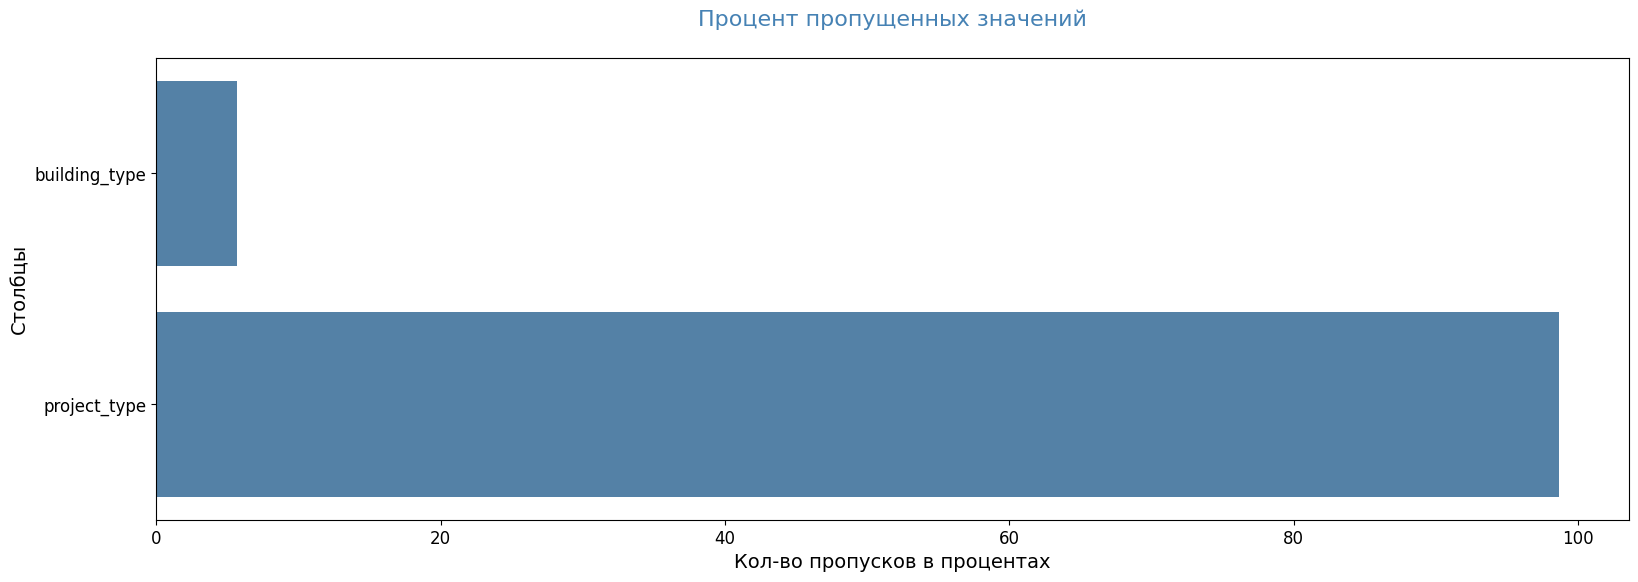

In [20]:
pass_value_barh(game)

## merge

Приклеем к нашей балице источник трафика

In [21]:
game = game.merge(users, how='left', on='user_id')

### Вывод:

В основном датасете есть пропуски на постройке проекта. В нашем случаее это не является пропуском, т.к. это значит, что игрок закончил 1й уровень через стратегию убийства врага(ПВП).

# Исследовательский анализ данных

## Кол-во уникальных пользователей

In [22]:
print('Уникальных пользователей в изучаемых данных:', game['user_id'].nunique())

Уникальных пользователей в изучаемых данных: 13576


### Вывод:

В нашем датасете больше 130т событий, которые сгенерировали 13 576 пользователей.

## От какого числа и по какое у нас данные

In [23]:
print('Первое событиев в данных датируется:', game['event_datetime'].min(),
      'последнее событиев в данных датируется:', game['event_datetime'].max())

Первое событиев в данных датируется: 2020-05-04 00:00:01 последнее событиев в данных датируется: 2020-06-05 12:32:49


## Посмотрим распределение по событиям

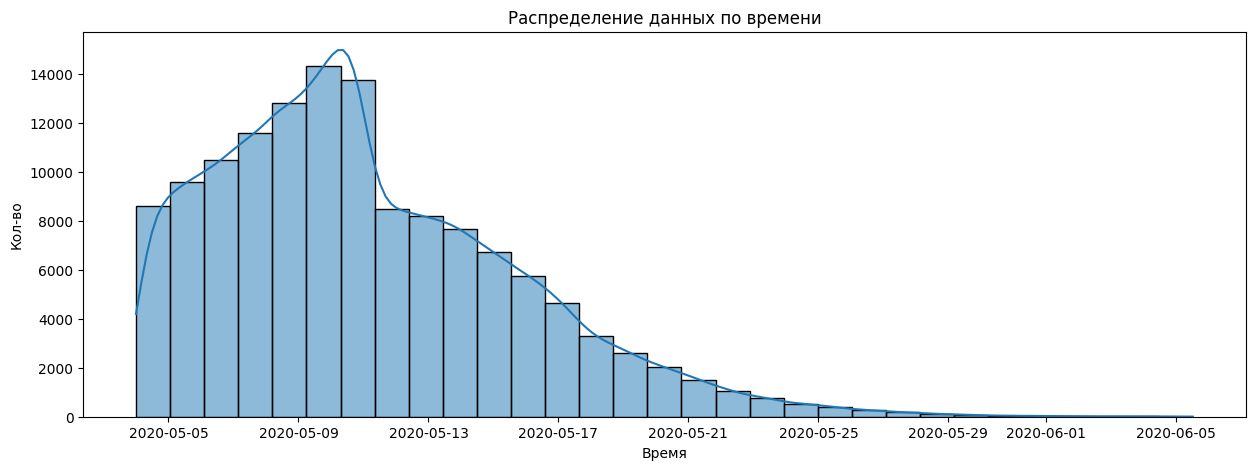

In [24]:
plt.figure(figsize=(15, 5))
sns.histplot(game['event_datetime'], bins=31, kde=True)
plt.title('Распределение данных по времени')
plt.ylabel('Кол-во')
plt.xlabel('Время');

### Вывод:

В нашем датасете видим довольно странное распределение с ростом в начале и до 10го числа. Думаю данное распределение связанно с тем, что в нашем датасете есть 2 основные стратегии прохождения игры. Первая происходитит через ПВП(убийство врага), вторая через строительство. Стратегия ПВП предполагает быстрое прохождения уровня и переход на следующий. Т.е. у него дальше не будет никаких событий и по этому идет резкая просадка в распределение. Так же стоит заметить, что с 4го по 10е мая в была реклмная компания на привлечение пользователей в игру.

## Какие события у нас есть

In [25]:
strategy_game = (pd.pivot_table(data=game.query('event != "building"'),
                                index='event',
                                values='user_id',
                                aggfunc='count',
                                margins=True,
                                margins_name='all')
                 .reset_index()
                 .sort_values(by='user_id',
                              ascending=False))

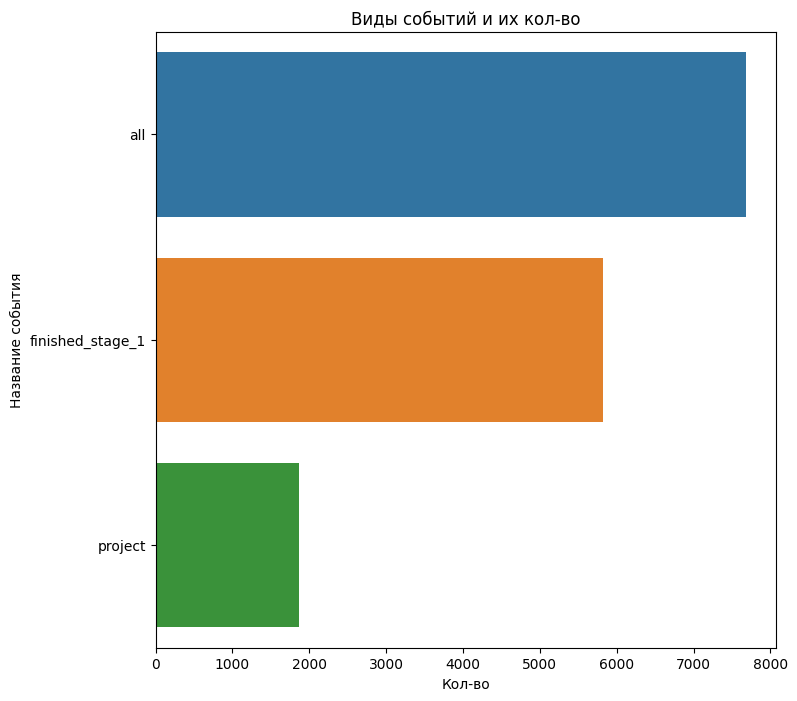

In [26]:

fig, ax = plt.subplots()

sns.barplot(data=strategy_game, y='event', x='user_id', ax=ax)
ax.set_title('Виды событий и их кол-во')
ax.set_xlabel('Кол-во')
ax.set_ylabel('Название события')
fig.set_figheight(8)
fig.set_figwidth(8)


plt.show();

In [27]:
s = game['user_id'].nunique()
b = game['project_type'].count()
g = game[game['event'] == 'finished_stage_1']
n = strategy_game['user_id'][2]

In [28]:
strategy_game

,event,user_id
2,all,7683
0,finished_stage_1,5817
1,project,1866


In [29]:
print('Общее кол-во уникальных пользователей:', s)
print('Кол-во пользователей которые закончили первый уровень:', n)
print('Процент закончевших 1 уровень от общего кол-ва пользователей:', round((n / s * 100), 2),'%')
print('Процент победивших через пвп от общего кол-ва пользователей:', round((g.shape[0] / s * 100), 2),'%')
print('Процент победивших через пвп от числа пользователей которые закончили 1 уровень:', round((g.shape[0] / n * 100), 2),'%' )
print('Процент победивших через проект от общего числа пользователей:', round((b / s * 100), 2),'%' )
print('Процент победивших через проект от числа пользователей которые закончили 1 уровень:', round((b / n * 100), 2),'%' )

Общее кол-во уникальных пользователей: 13576
Кол-во пользователей которые закончили первый уровень: 7683
Процент закончевших 1 уровень от общего кол-ва пользователей: 56.59 %
Процент победивших через пвп от общего кол-ва пользователей: 42.85 %
Процент победивших через пвп от числа пользователей которые закончили 1 уровень: 75.71 %
Процент победивших через проект от общего числа пользователей: 13.74 %
Процент победивших через проект от числа пользователей которые закончили 1 уровень: 24.29 %


### Вывод:

Мы имеем 3 вида события. 2 из которых являются уникальными для каждого пользователя - это переход на следующий уровень. В описании указано, что переход на следующий уровень вызывается или постройкой проекта, или уничтожением врага.

В нашем датасете из из 13т пользователей, первый уровень прошло 56%. Из этих пользователей мы выделили, что 75% заканчивают через победу на врагом, а 24% через постройку проекта.

## Как стратегия прохождения влияет на пребывание в игре

In [30]:
#pd.set_option('max_rows', 5)
pd.set_option('display.max_colwidth', None)
pd.set_option('display.float_format', '{:.2f}'.format)

In [31]:
pd.pivot_table(data=game, index='user_type', values='life_time', aggfunc={'life_time':['mean', 'median']}).style.format('{:.1f}', na_rep='-')

,mean,median
user_type,,
builders,13.4,13.0
not_finish,11.0,11.0
warriors,11.6,11.0


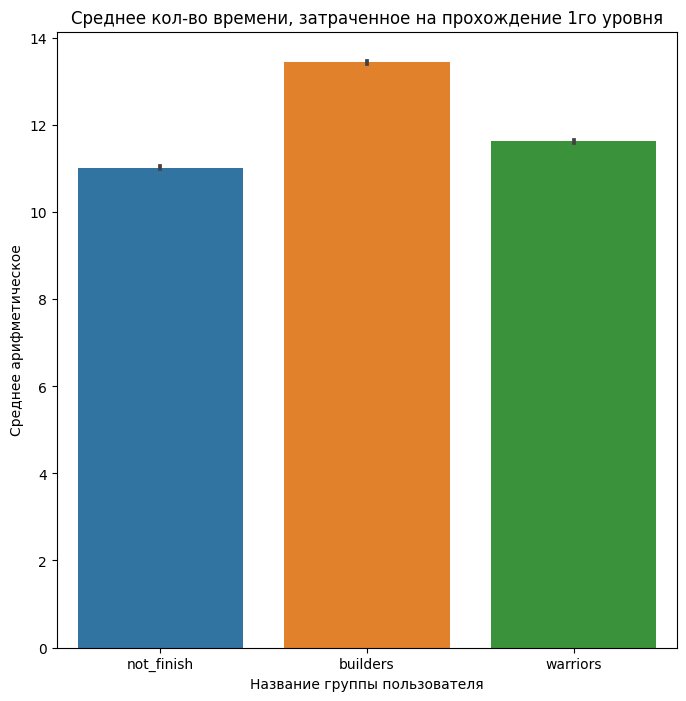

In [32]:
fig, ax = plt.subplots()

sns.barplot(data=game, y='life_time', x='user_type', ax=ax)
ax.set_title('Среднее кол-во времени, затраченное на прохождение 1го уровня')
ax.set_ylabel('Среднее арифметическое')
ax.set_xlabel('Название группы пользователя')
fig.set_figheight(8)
fig.set_figwidth(8)

plt.show();

### Вывод:

Среднее и медианное время прохождения в игре колеблится от 11 до 13 дней. Не сильный разрыв, чтоб можно было судить о сильном отличии игроков.

## Посмотрим на здания

In [33]:
crocodil = game.pivot_table(index = ['building_type'],
                              values = 'user_id',
                              aggfunc = {'user_id' : ['count', 'nunique']}).reset_index()
crocodil['%'] = crocodil['nunique'] / crocodil['count'] * 100

In [34]:
crocodil

,building_type,count,nunique,%
0,assembly_shop,54494,13576,24.91
1,research_center,14137,7671,54.26
2,spaceport,59325,13231,22.30


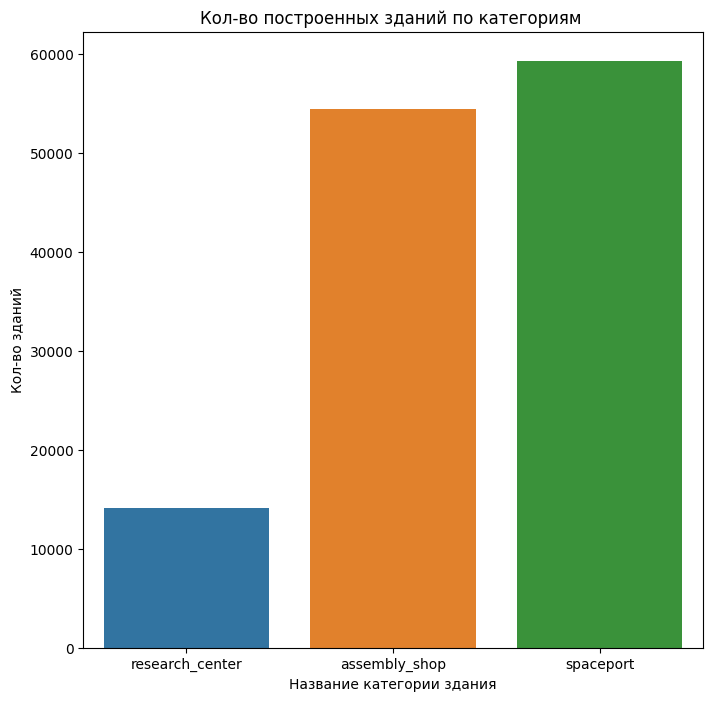

In [35]:
fig, ax = plt.subplots()

sns.barplot(data=crocodil.sort_values(by='count'), y='count', x='building_type', ax=ax)
ax.set_title('Кол-во построенных зданий по категориям ')
ax.set_ylabel('Кол-во зданий')
ax.set_xlabel('Название категории здания')
fig.set_figheight(8)
fig.set_figwidth(8)

plt.show();

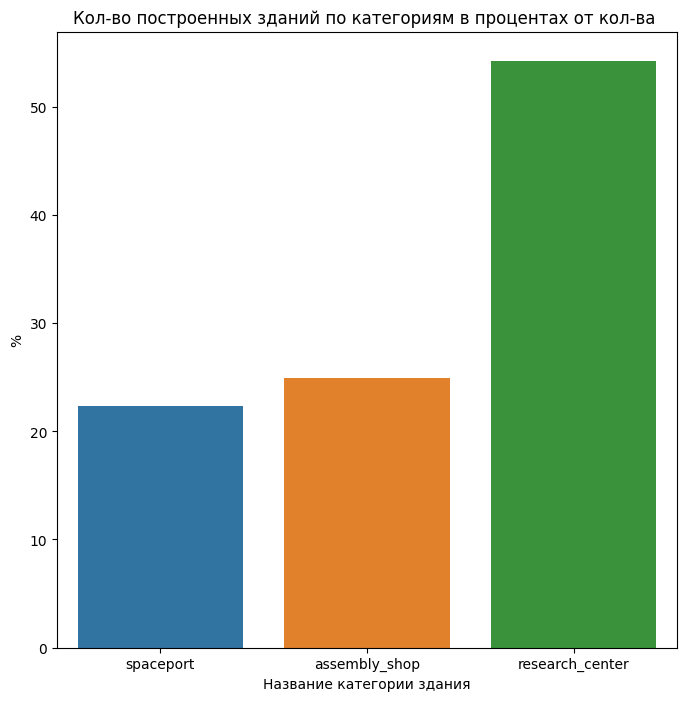

In [36]:
fig, ax = plt.subplots()

sns.barplot(data=crocodil.sort_values(by='%'), y='%', x='building_type', ax=ax)
ax.set_title('Кол-во построенных зданий по категориям в процентах от кол-ва ')
ax.set_ylabel('%')
ax.set_xlabel('Название категории здания')
fig.set_figheight(8)
fig.set_figwidth(8)

plt.show();

### Вывод:

Видно, что 2 основыных здания которые стороятся - это assembly_shop и spaceport. Смею предположить, что 2 этих здания отвечают за постройку юнитов. А research_center отвечат за какие-то улучшения.

В процентном отношение центр выбивается из-за того, что его относительная постройка на пользователей превышает больше половины уникальных пользователей.

## Обзор рекламы

In [37]:
ad_costs['day'] = pd.to_datetime(ad_costs['day'])
ad_costs['day'] += pd.Timedelta('1 days')
ad_costs = ad_costs[ad_costs['day'] <= '2020-05-10']

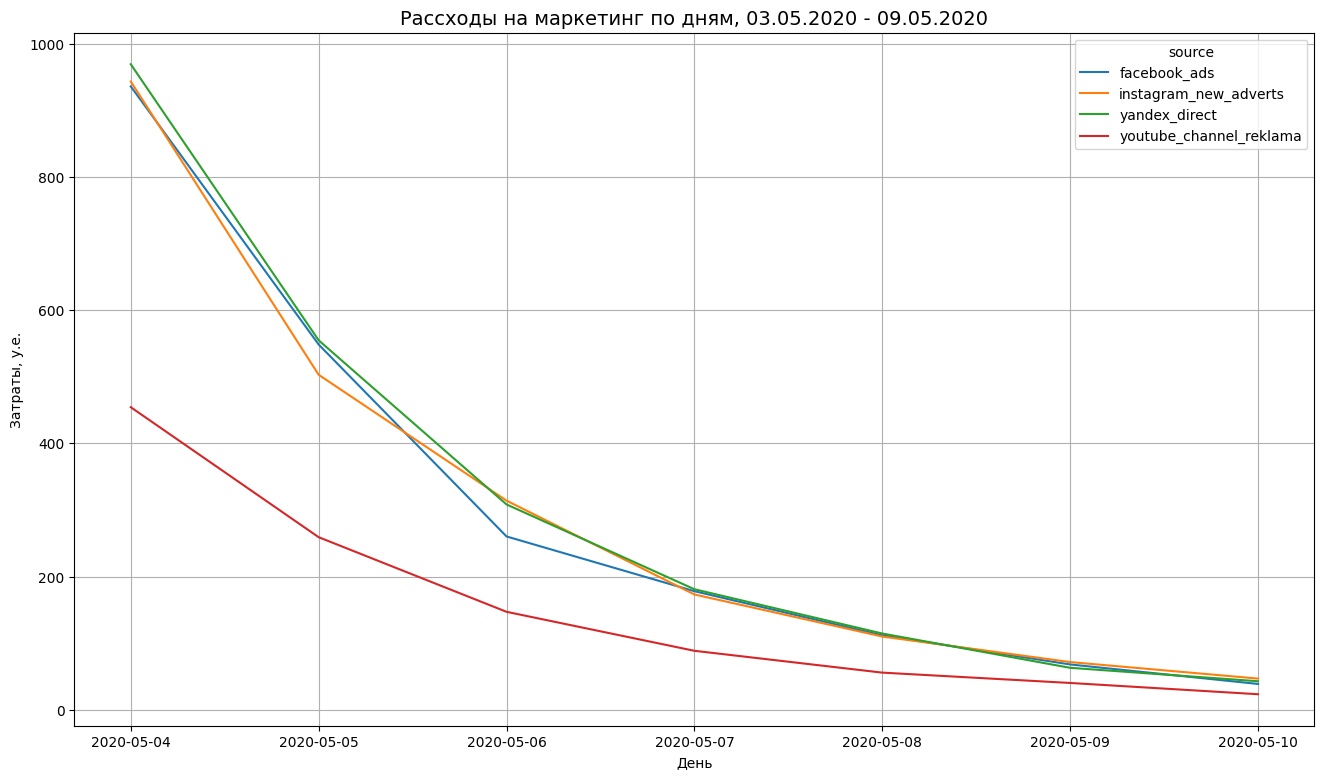

In [38]:
plt.figure(figsize=(16, 9))
sns.lineplot(data = ad_costs, x='day', y='cost', hue='source')
plt.title('Рассходы на маркетинг по дням, 03.05.2020 - 09.05.2020', fontsize=14)
plt.xlabel('День')
plt.ylabel('Затраты, у.е.')
plt.grid()
plt.show()

In [39]:
print('Общая сумма затрат на маркетинг {:.2f} у.е.'.format(ad_costs['cost'].sum()))

Общая сумма затрат на маркетинг 7603.58 у.е.


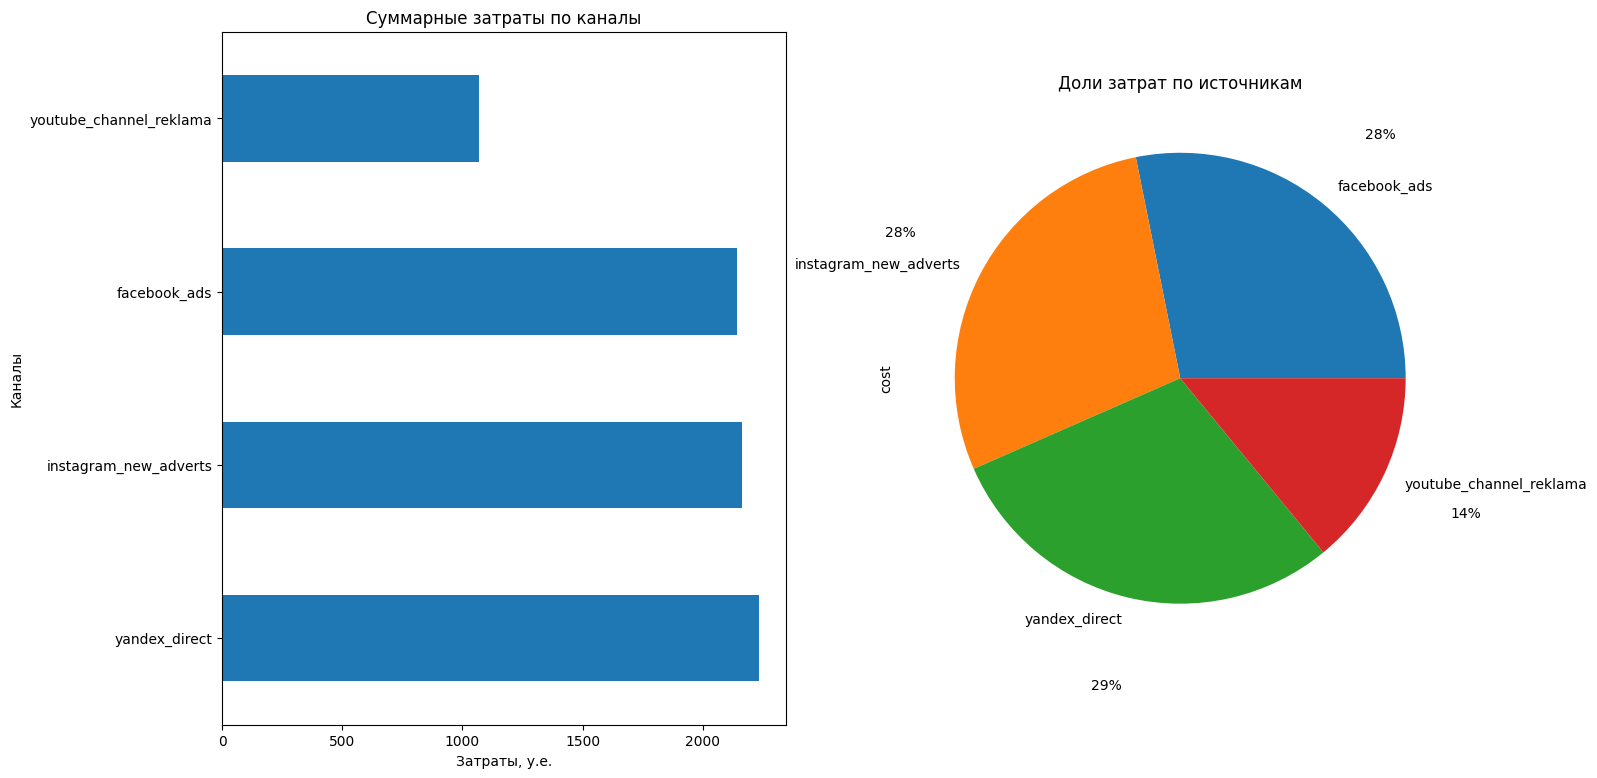

In [40]:
fig, axes = plt.subplots(1, 2, figsize=(16, 9))

ad_costs.groupby('source')['cost'].sum().sort_values(ascending=False).plot(kind='barh', ax=axes[0])
axes[0].set_title('Суммарные затраты по каналы')
axes[0].set_ylabel('Каналы')
axes[0].set_xlabel('Затраты, у.е.')

(ad_costs.groupby('source')['cost'].sum() /
 ad_costs['cost'].sum()).plot(kind='pie', ax=axes[1],
        autopct='%1.0f%%', pctdistance=1.4, labeldistance=1.1)
axes[1].set_title('Доли затрат по источникам')
plt.show()

### Вывод:

Рекламная компания началась с 04.05 по 10.05. включительно. Из описания нам известно, что оплата за рекламу проходила авансом.

Из графика расхода по дням видим, что с каждым днем затраты на рекламную кампанию уменьшались.

Из анализа суммарных затрат по источникам следует, что три из четырех источников имеют примерно одинаковые затраты (доля 28-29%), в то время как реклама на YouTube обходится практически в два раза дешевле, чем в других источниках (составляет 14% от общего бюджета).

## Проанализирем пользователей

In [41]:
table_user = pd.pivot_table(data=game, index=['source', 'user_type'], values='user_id', aggfunc='nunique').reset_index()
table_user

,source,user_type,user_id
0,facebook_ads,builders,391
1,facebook_ads,not_finish,1576
2,facebook_ads,warriors,759
3,instagram_new_adverts,builders,476
4,instagram_new_adverts,not_finish,1881
5,instagram_new_adverts,warriors,990
6,yandex_direct,builders,620
7,yandex_direct,not_finish,2775
8,yandex_direct,warriors,1422
9,youtube_channel_reklama,builders,379


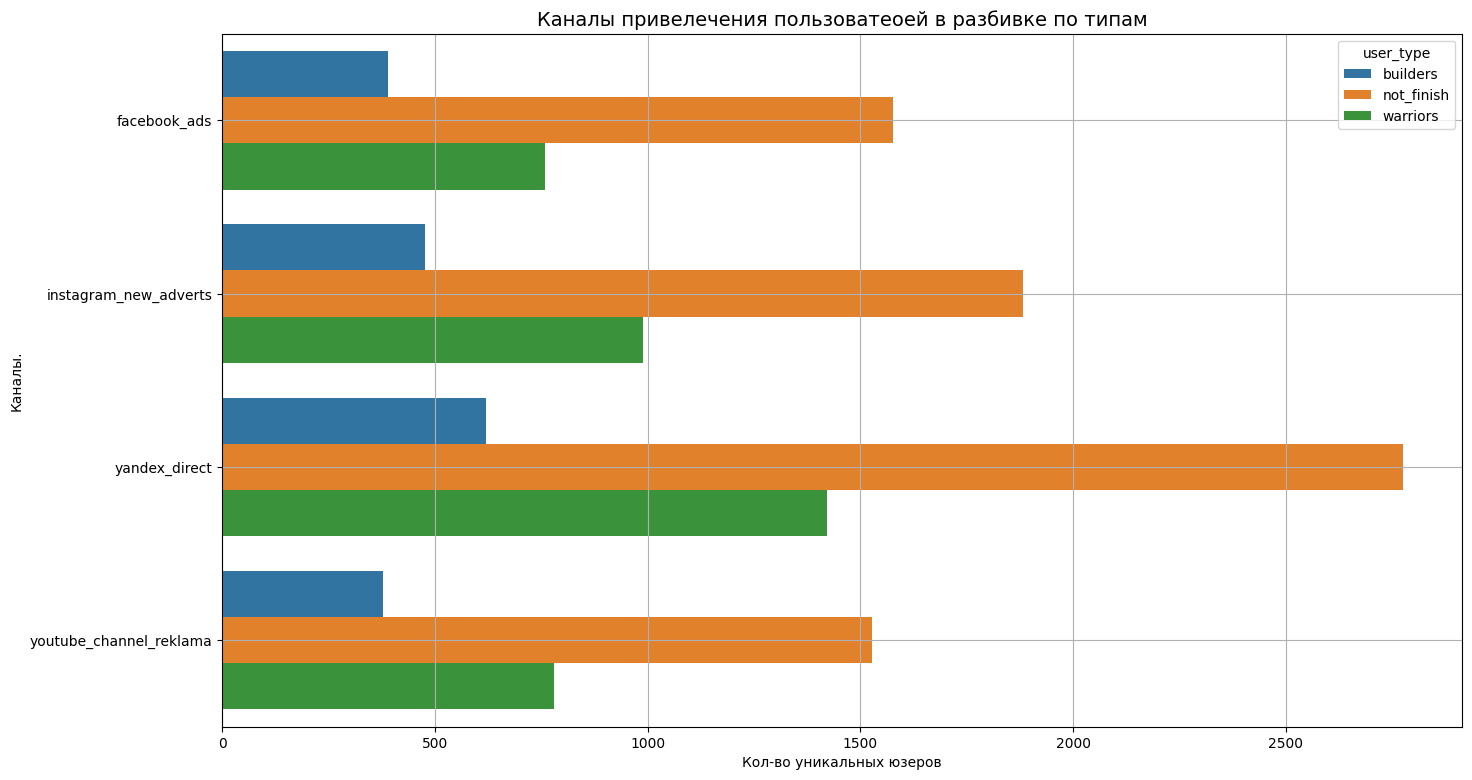

In [42]:
plt.figure(figsize=(16, 9))
sns.barplot(data = table_user, x='user_id', y='source', hue='user_type')
plt.title('Каналы привелечения пользоватеоей в разбивке по типам', fontsize=14)
plt.xlabel('Кол-во уникальных юзеров')

plt.ylabel('Каналы.')
plt.grid()
plt.show()

In [43]:
table_user = pd.pivot_table(data=game, index=['user_type', 'building_type'], values='user_id', aggfunc='nunique').reset_index()
table_user

,user_type,building_type,user_id
0,builders,assembly_shop,1866
1,builders,research_center,1866
2,builders,spaceport,1866
3,not_finish,assembly_shop,7759
4,not_finish,research_center,3463
5,not_finish,spaceport,7471
6,warriors,assembly_shop,3951
7,warriors,research_center,2342
8,warriors,spaceport,3894


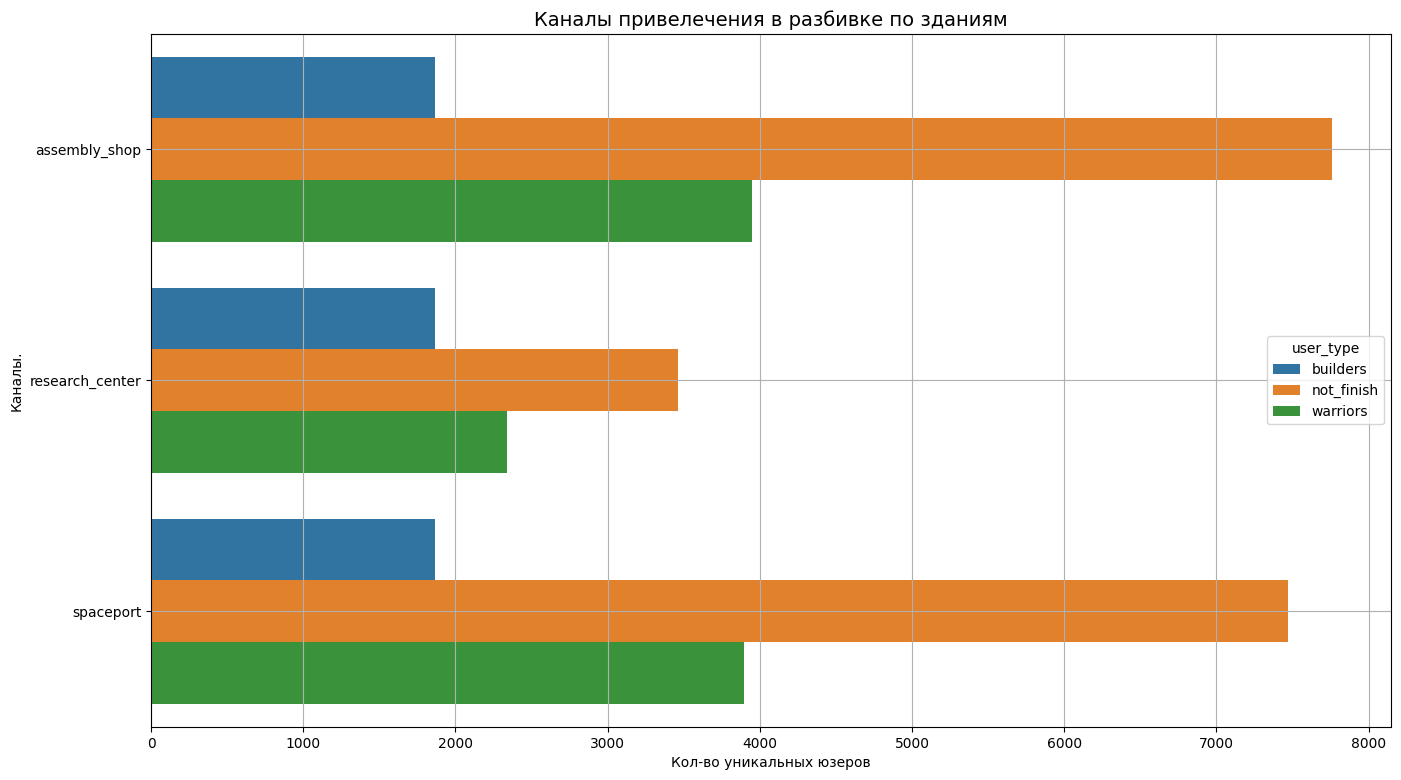

In [44]:
plt.figure(figsize=(16, 9))
sns.barplot(data = table_user, x='user_id', hue='user_type', y='building_type')
plt.title('Каналы привелечения в разбивке по зданиям', fontsize=14)
plt.xlabel('Кол-во уникальных юзеров')

plt.ylabel('Каналы.')
plt.grid()
plt.show()

In [45]:
table_user = pd.pivot_table(data=game, index=['source', 'building_type'], values='user_id', aggfunc='nunique').reset_index()
table_user

,source,building_type,user_id
0,facebook_ads,assembly_shop,2726
1,facebook_ads,research_center,1577
2,facebook_ads,spaceport,2664
3,instagram_new_adverts,assembly_shop,3347
4,instagram_new_adverts,research_center,1906
5,instagram_new_adverts,spaceport,3268
6,yandex_direct,assembly_shop,4817
7,yandex_direct,research_center,2710
8,yandex_direct,spaceport,4700
9,youtube_channel_reklama,assembly_shop,2686


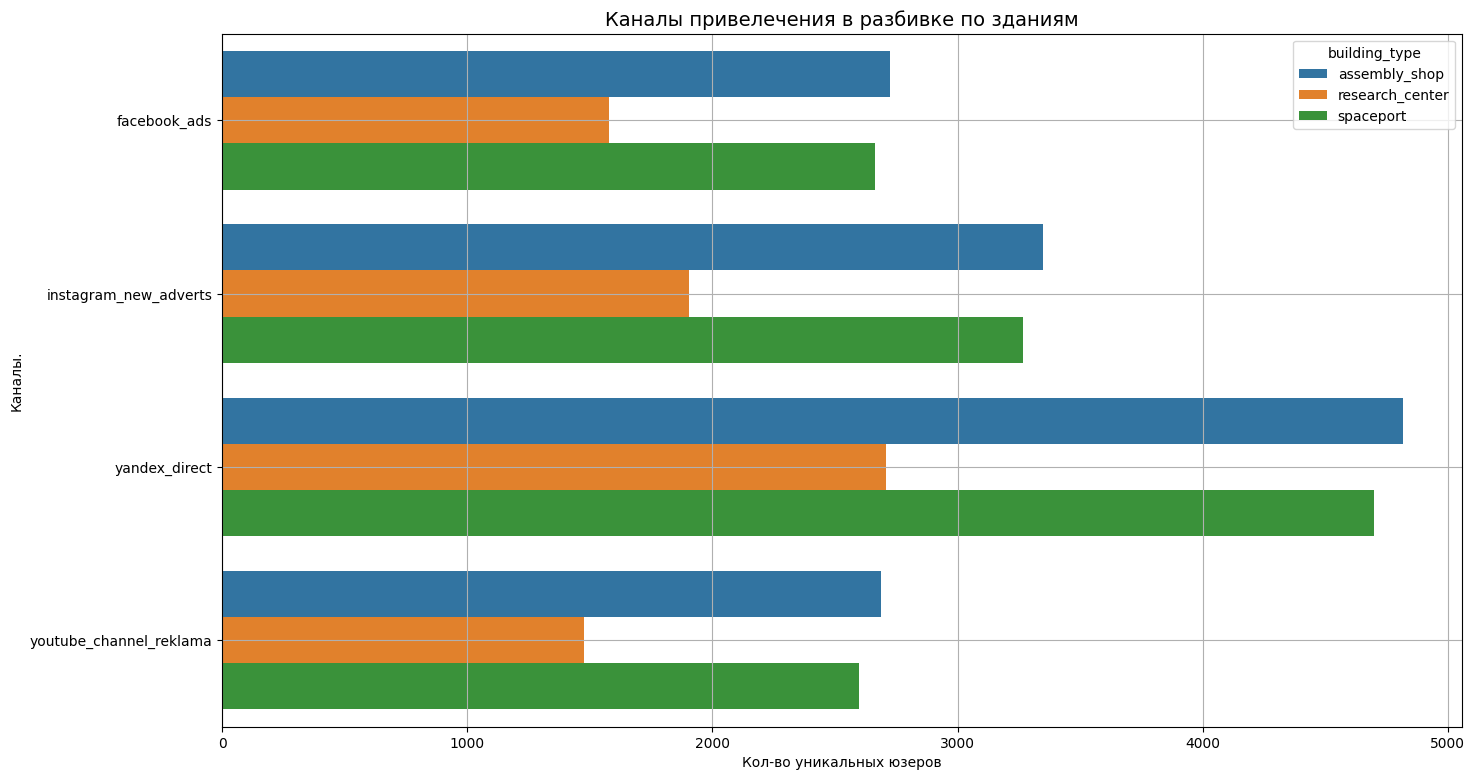

In [46]:
plt.figure(figsize=(16, 9))
sns.barplot(data = table_user, x='user_id', y='source', hue='building_type')
plt.title('Каналы привелечения в разбивке по зданиям', fontsize=14)
plt.xlabel('Кол-во уникальных юзеров')

plt.ylabel('Каналы.')
plt.grid()
plt.show()

In [47]:
table_user = pd.pivot_table(data=game, index=['source', 'event'], values='user_id', aggfunc='nunique').reset_index()
table_user

,source,event,user_id
0,facebook_ads,building,2726
1,facebook_ads,finished_stage_1,1150
2,facebook_ads,project,391
3,instagram_new_adverts,building,3347
4,instagram_new_adverts,finished_stage_1,1466
5,instagram_new_adverts,project,476
6,yandex_direct,building,4817
7,yandex_direct,finished_stage_1,2042
8,yandex_direct,project,620
9,youtube_channel_reklama,building,2686


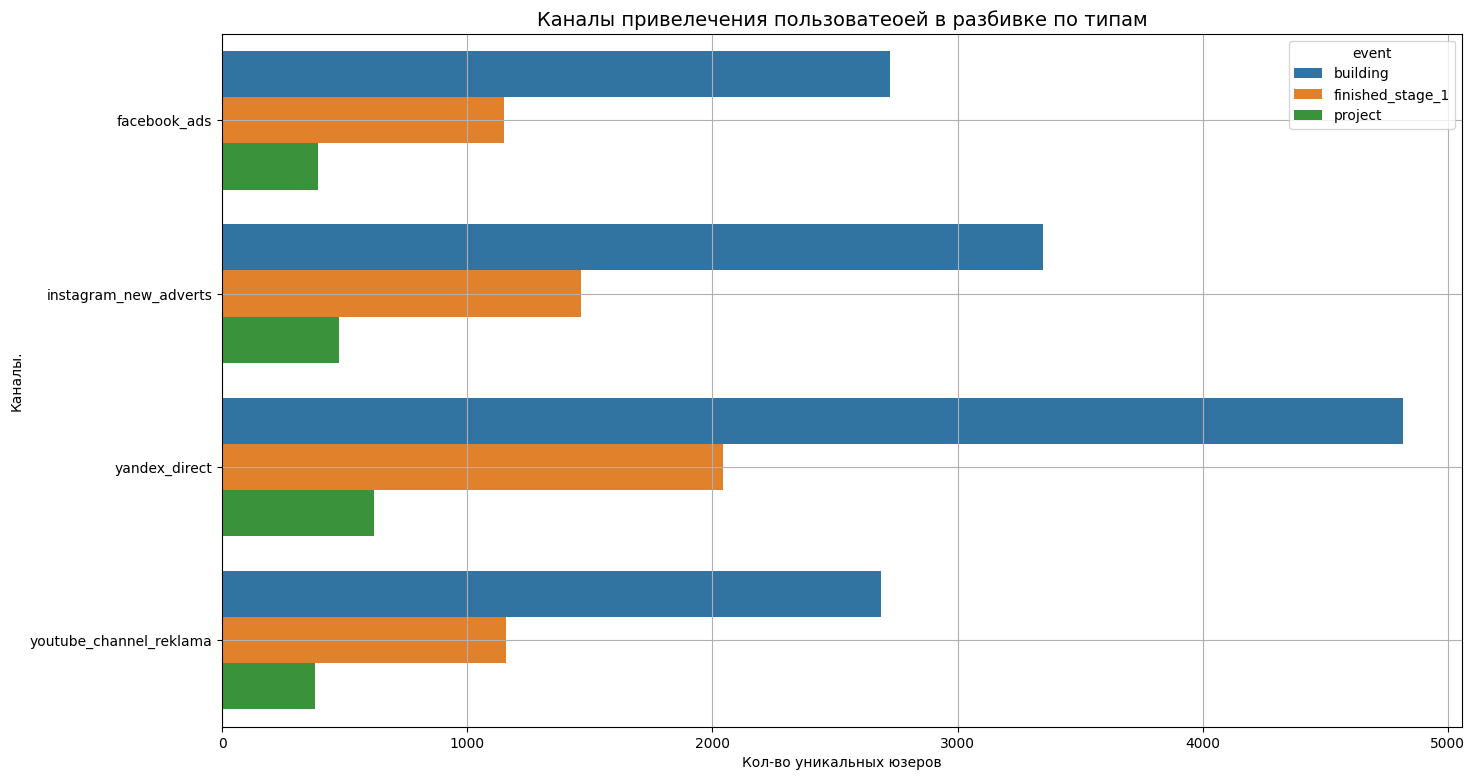

In [48]:
plt.figure(figsize=(16, 9))
sns.barplot(data = table_user, x='user_id', y='source', hue='event')
plt.title('Каналы привелечения пользоватеоей в разбивке по типам', fontsize=14)
plt.xlabel('Кол-во уникальных юзеров')

plt.ylabel('Каналы.')
plt.grid()
plt.show()

In [49]:
table_user = pd.pivot_table(data=game, index=['source', 'life_time'], values='user_id', aggfunc='nunique').reset_index()
table_user

,source,life_time,user_id
0,facebook_ads,0,17
1,facebook_ads,1,5
2,facebook_ads,2,23
3,facebook_ads,3,57
4,facebook_ads,4,75
...,...,...,...
117,youtube_channel_reklama,24,3
118,youtube_channel_reklama,25,3
119,youtube_channel_reklama,26,1
120,youtube_channel_reklama,27,2


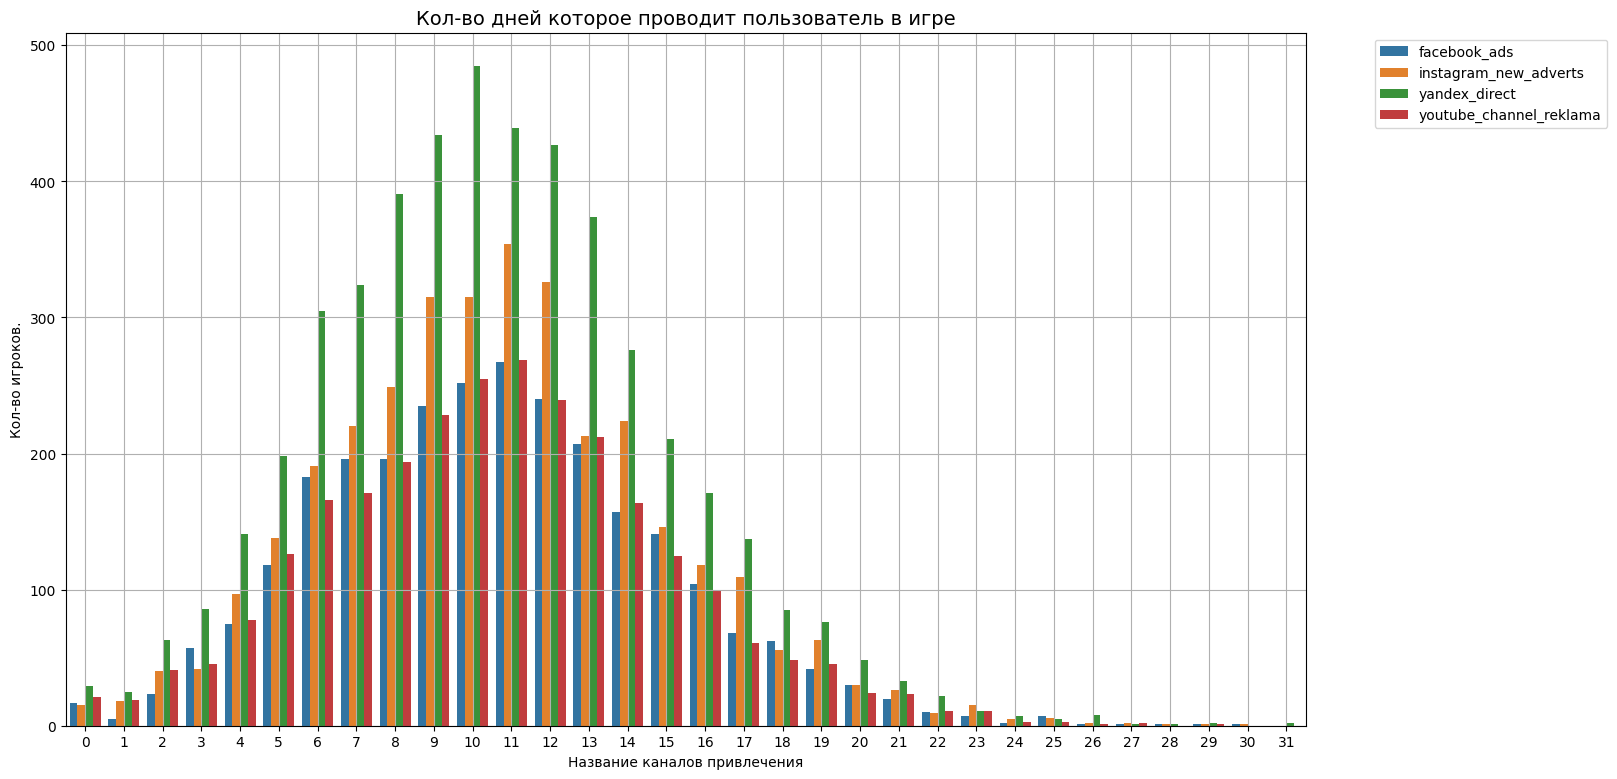

In [50]:
plt.figure(figsize=(16, 9))
sns.barplot(data = table_user, y='user_id', x='life_time', hue='source')
plt.title('Кол-во дней которое проводит пользователь в игре', fontsize=14)
plt.xlabel('Название каналов привлечения')
plt.ylabel('Кол-во игроков.')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid()
plt.show()

In [51]:
sss = ad_costs.groupby('source')['cost'].sum()

In [52]:
ddd = game.groupby('source')['user_id'].nunique()

In [53]:
a = pd.concat([sss, ddd], axis=1, join='outer').reset_index()
a['cac'] = a['cost'] / a['user_id']
a

,source,cost,user_id,cac
0,facebook_ads,2140.90,2726,0.79
1,instagram_new_adverts,2161.44,3347,0.65
2,yandex_direct,2233.11,4817,0.46
3,youtube_channel_reklama,1068.12,2686,0.40


<ipython-input-54-0a2b08a74061>:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  ax = sns.barplot(x = 'source', y = 'cac', data=a, ci=None, palette="muted",orient='v')


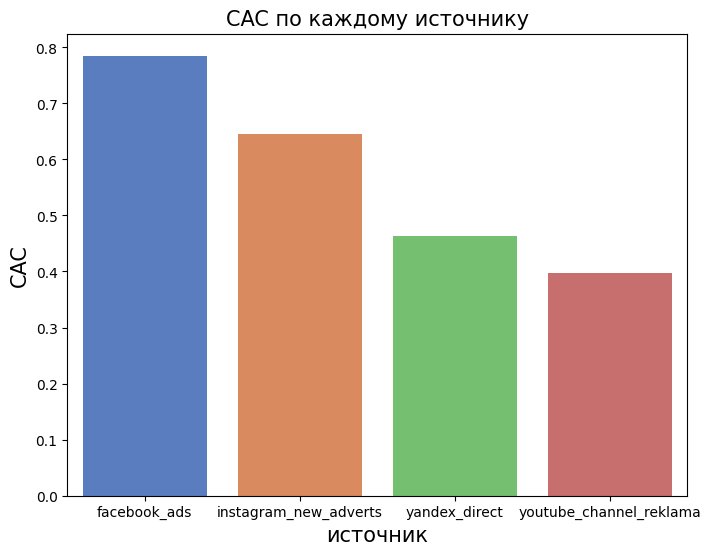

In [54]:


bar,ax = plt.subplots(figsize=(8,6))
ax = sns.barplot(x = 'source', y = 'cac', data=a, ci=None, palette="muted",orient='v')
ax.set_title('CAC по каждому источнику', fontsize=15)
ax.set_xlabel ('источник', fontsize=15)
ax.set_ylabel ('CAC', fontsize=15);



In [55]:
game.groupby('source')['user_id'].nunique().sum()

13576

### Вывод:

В целом по графикам разбивки по категориям видно, что кол-во действий, стратегий и источника, и дням проведенных в игре, пользователи не сильно отличаются. Отличается кол-во привлеченных пользователей по каналам, а соответвенно и цена привлечения.
Самыми удачными  каналом привлечения является yandex_direct и youtube. Цена за клик у них меньше, чем у фейсбука и инстаграмма. Но бюджет распределен не в пользу ютуба.

In [56]:
game['steps'] = (game['building_type']
                         .fillna(game['project_type'])
                         .fillna(game['event']))

# Проверка гипотез

## Проверим гипотезу о равенстве времени завершения уровня у строителей и воинов

Н0: время завершения уровня не отличается в зависимости от способа прохождения

Н1: время завершения уровня различается в зависимости от способа прохождения


In [57]:
alpha = .05
results = st.ttest_ind(
    game[game.user_type == 'builders'].groupby('user_id')['life_time_1'].max(),
    game[game.user_type == 'warriors'].groupby('user_id')['life_time_1'].max(),
    equal_var = False)

print('p-значение:', results.pvalue)

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 6.570466755642887e-105
Отвергаем нулевую гипотезу


Отвергаем нулевую гипотезу, что время прохождения пвп или пве одинаковое. Имеется различие, хотя по графикам это не особо заметно. Строители в среднем проводят на 2 больше в игре, чем войны.

In [58]:
game.groupby('user_type')['life_time'].mean()

user_type
builders     13.43
not_finish   11.02
warriors     11.63
Name: life_time, dtype: float64

In [59]:
game.groupby('user_type')['life_time_1'].mean()

user_type
builders     19343.98
not_finish   15867.05
warriors     16742.66
Name: life_time_1, dtype: float64

## Проврим гипотезу Если ли статистическая значимости средних значений по источникам в продолжительности игры.

Н0: Нет различий пребывания в игре в зависимости от источника.

Н1: Есть различий пребывания в игре в зависимости от источника

In [60]:
grouped_df = game.groupby('source')['life_time'].mean()

# Вывести результаты группировки
print(grouped_df)

# Проверить, есть ли статистически значимые различия между средними значениями продолжительности игры для разных источников
f_stat, p_value = f_oneway(game[game['source'] == 'youtube_channel_reklama']['life_time'],
                           game[game['source'] == 'facebook_ads']['life_time'],
                           game[game['source'] == 'instagram_new_adverts']['life_time'],
                           game[game['source'] == 'yandex_direct']['life_time'])

# Вывести результаты теста
print('F-statistic:', f_stat)
print('p-value:', p_value)

source
facebook_ads              11.71
instagram_new_adverts     11.79
yandex_direct             11.62
youtube_channel_reklama   11.67
Name: life_time, dtype: float64
F-statistic: 11.854303222489165
p-value: 9.28416195003398e-08


In [61]:
grouped_df = game.groupby('source')['life_time'].mean()

alpha = .05
# Вывести результаты группировки
print(grouped_df)

# Проверить, есть ли статистически значимые различия между средними значениями продолжительности игры для разных источников
f_stat, p_value = f_oneway(game[game['source'] == 'youtube_channel_reklama']['life_time_1'],
                           game[game['source'] == 'facebook_ads']['life_time_1'],
                           game[game['source'] == 'instagram_new_adverts']['life_time_1'],
                           game[game['source'] == 'yandex_direct']['life_time_1'])

# Вывести результаты теста
if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")
print('p-value:', p_value)

source
facebook_ads              11.71
instagram_new_adverts     11.79
yandex_direct             11.62
youtube_channel_reklama   11.67
Name: life_time, dtype: float64
Отвергаем нулевую гипотезу
p-value: 9.28416195003398e-08


Мы можем отвергнуть нулевую гипотезу о том, что все коэффициенты линейной регрессии равны нулю (то есть модель не объясняет данные лучше, чем просто среднее значение). Значение F-статистики 11,85 означает, что модель значима, и вероятность того, что мы получили эти результаты случайно, крайне мала (p-value = 9.28e-08). Таким образом, мы можем с уверенностью сказать, что линейная регрессия объясняет зависимость между зависимой переменной и одной или несколькими независимыми переменными в данном датасете.

# Общий вывод

По результатам анализа данных по поведению пользователей мобильной игры было выявлено следующее:

    Привлечено 13576 игроков, которые пришли из 4 разных источников. Яндекс.Директ привлек 35,5% игроков, Инстаграм - 24.6%, Фейсбук - 20%, Ютьюб - 19.8%.
    Среднее время, проведенное игроками в игре, составляет 12 дней, при этом кол-во затраченного времени примерно одинаково по всем источникам. В среднем "воины" проводят в игре 11 дней, а "строители" - 13 дней.
    Вне зависимости от платформы, с которой игроки пришли, они показывают сравнительно похожую модель поведения: в игре больше "воинов", здания строятся в среднем одинаково, но "строители" строят больше зданий. Процент игроков, завершивших 1 уровень, примерно одинаков и составляет 42-44%.
    Затраты на привлечение игроков из Фейсбука в 2 раза дороже, чем из Ютьюба, при этом нет оснований полагать, что доли игроков, завершивших 1 уровень, различаются. Ютьюб является самым дешевым источником.
    На основе полученных результатов можно рекомендовать упор на привлечение игроков с Ютьюба, а также направить характер рекламных кампаний в сторону более "воинственных" игроков. Кроме того, необходимо выяснить, почему многие игроки проводят более 200 часов в игре, но так и не завершают 1 уровень.